In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
gamma = 5.0 / 3.0  # Показатель адиабаты
rho = 1.0         # Плотность газа (начально равна 1)
u_gas = 0.0      # Скорость газа (начально равна 0)
u_piston = 0.2   # Скорость поршня
p = 1.0 / gamma   # Давление газа

# Задание параметров сетки
x_start = 0.0     # Начальная координата
x_end = 1.0       # Конечная координата
N = 100           # Количество узлов сетки
dx = (x_end - x_start) / N  # Шаг по координате

# Инициализация массивов для плотности, скорости и давления
rho_array = np.ones(N) * rho
u_array = np.ones(N) * u_gas
p_array = np.ones(N) * p

# Итерационный шаг по времени
dt = 0.01  # Шаг по времени
t_end = 1.0  # Конечное время моделирования
n_steps = int(t_end / dt)  # Количество итераций

# Моделирование движения поршня
for step in range(n_steps):
    # Рассчет характеристик
    c = np.sqrt(gamma * p_array / rho_array)  # Скорость звука
    dt_c = dx / (np.max(np.abs(u_array - u_piston)) + np.max(c))  # Временной шаг, связанный со скоростью звука и разностью скорости газа и скорости поршня
    
    # Обновление значений плотности, скорости и давления
    rho_array[1:] = rho_array[1:] - dt_c / dx * (rho_array[1:] * (u_array[1:] - u_array[:-1]))
    u_array[1:] = u_array[1:] - dt_c / dx * ((p_array[1:] - p_array[:-1]) / rho_array[1:] + u_array[1:] * (u_array[1:] - u_array[:-1]))
    p_array[1:] = p_array[1:] - dt_c / dx * (gamma * p_array[1:] * (u_array[1:] - u_array[:-1]) +
                                              u_array[1:] * (p_array[1:] - p_array[:-1]))
    
    # Граничное условие для движущегося поршня
    u_array[0] = u_piston


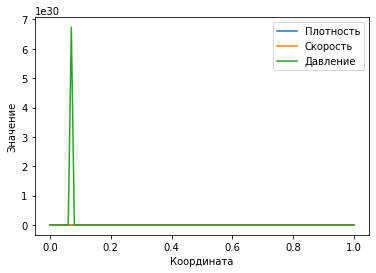

In [4]:

# Визуализация результатов
x = np.linspace(x_start, x_end, N)
plt.plot(x, rho_array, label='Плотность')
plt.plot(x, u_array, label='Скорость')
plt.plot(x, p_array, label='Давление')
plt.legend()
plt.xlabel('Координата')
plt.ylabel('Значение')
plt.show()